**EDA on Customers.csv**

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
customers = pd.read_csv('Customers.csv')

In [11]:
# Display basic information
print(customers.info())
print(customers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [12]:
# Check for missing values
print("Missing values:\n", customers.isnull().sum())

Missing values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [13]:
# Ensure CustomerID is unique
print("Unique Customer IDs:", customers['CustomerID'].nunique())

Unique Customer IDs: 200


In [14]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


In [15]:
# Analyze region distribution
region_counts = customers['Region'].value_counts()
print("Customers by Region:\n", region_counts)

Customers by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-16-c116ec4545aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


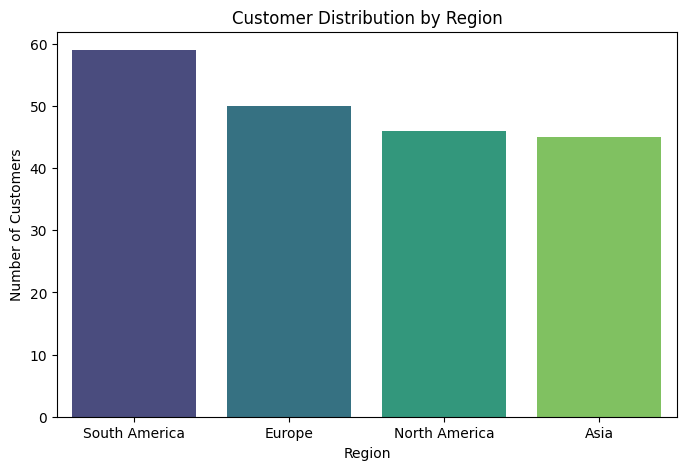

In [16]:
# Visualize region distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [17]:
# Analyze signup trends over time
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupYearMonth'].value_counts().sort_index()

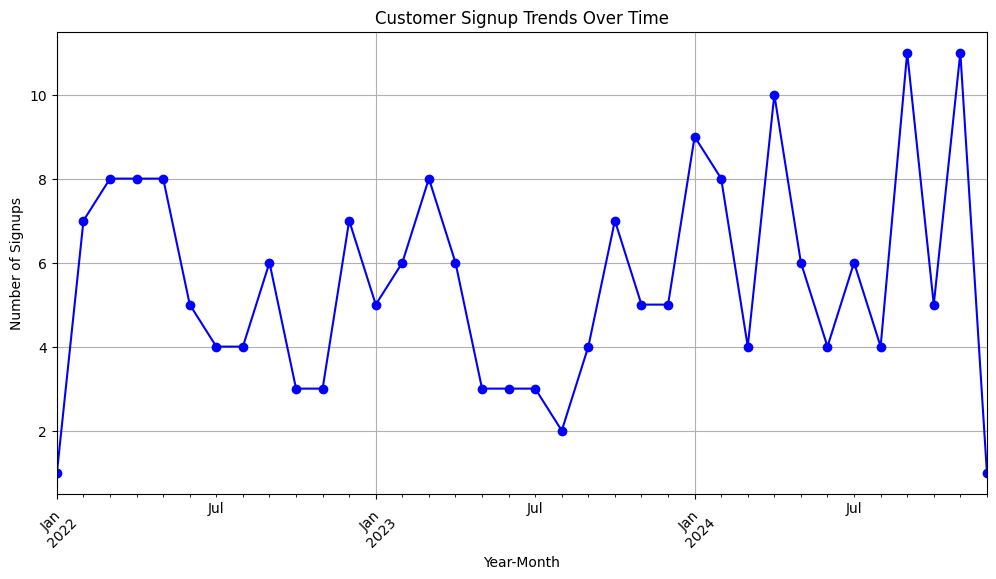

In [18]:
# Visualize signup trends
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Business Insights for Customers dataset:**

1. Customer Distribution by Region: South America has the highest number of customers (59), followed by Europe (50). North America and Asia have a similar number of customers (46 and 45, respectively). This suggests a strong customer base in South America, indicating potential for localized marketing campaigns.

2. No Missing Data: All columns in the dataset are complete with no missing values. This ensures the data is reliable and ready for analysis without requiring additional cleaning.

3. Unique Customers: There are 200 unique Customer IDs, confirming no duplicates in the dataset. This validates that the dataset accurately represents individual customers.

4. Signup Trends: The signup dates span multiple years, with specific peaks in certain months (e.g., July 2022). Seasonal promotions or events during these months may have boosted customer signups.

5. Market Segmentation Opportunity: The balanced distribution of customers across Asia, North America, and Europe indicates potential for personalized marketing strategies in these regions. South America, being the largest market, could also benefit from targeted retention efforts.



**EDA on Products.csv**

In [19]:
# Load the dataset
products = pd.read_csv('Products.csv')

In [20]:
# Display basic information
print(products.info())
print(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [21]:
# Check for missing values
print("Missing values:\n", products.isnull().sum())

Missing values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [22]:
# Check for duplicates
print("Duplicate ProductIDs:", products['ProductID'].duplicated().sum())

Duplicate ProductIDs: 0


In [23]:
# Check unique categories and products
print("Total Products:", products['ProductID'].nunique())
print("Unique Categories:", products['Category'].nunique())


Total Products: 100
Unique Categories: 4


In [24]:
# Check price statistics
print("Price Statistics:\n", products['Price'].describe())

Price Statistics:
 count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


<ipython-input-25-5897b0c2177c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')


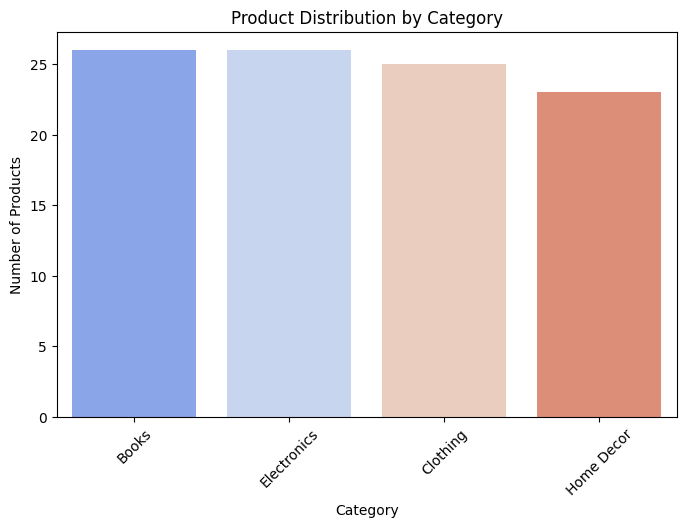

In [25]:
# Visualize product distribution by category
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

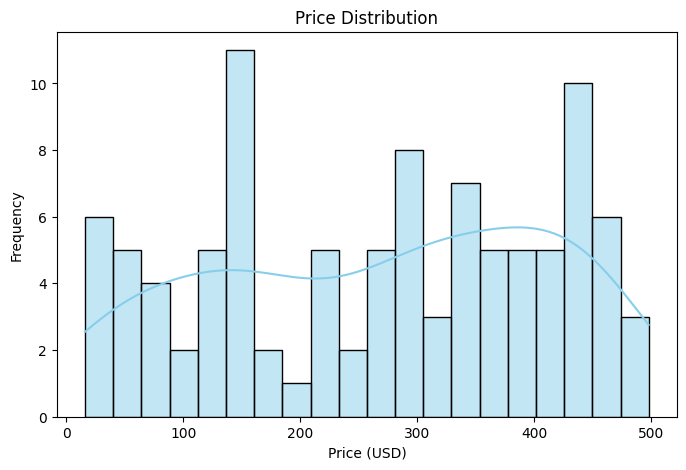

In [26]:
# Visualize price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, bins=20, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-27-5431a46ec5da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=products, palette='viridis')


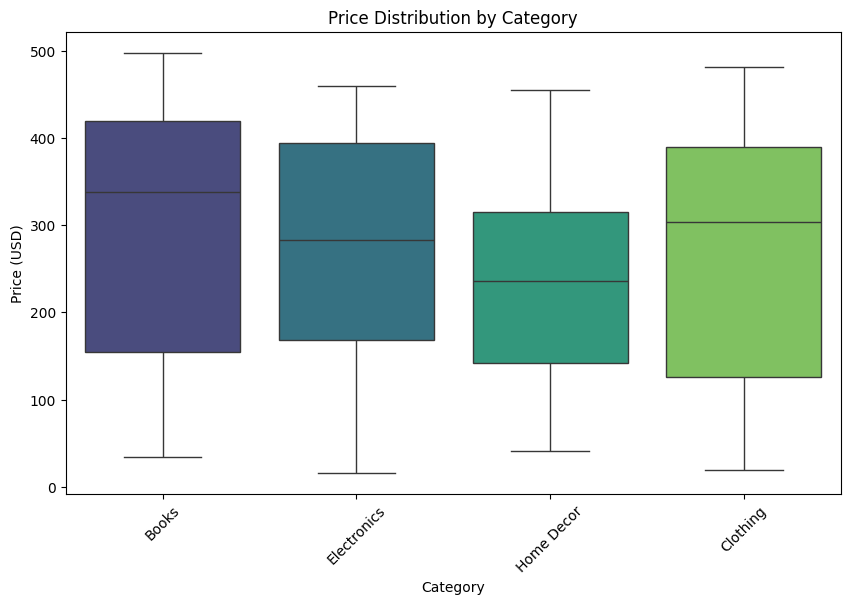

In [27]:
# Boxplot for price by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=products, palette='viridis')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()


**Business Insights Based on EDA of Products.csv**

1. Diverse Product Categories:
The dataset includes products from four categories: Books, Electronics, Home Decor, and Clothing. This diversity indicates opportunities for targeting various customer preferences and cross-category promotions.

2. Price Range and Distribution:
Product prices range from $16.08 to $497.76, with an average price of $267.55. The wide price range suggests the presence of both budget-friendly and premium products, allowing for flexible pricing strategies.

3. High Price Variability:
The standard deviation of $143.22 indicates significant variability in product pricing. Categories like Electronics and Home Decor might contribute more to this variation, providing an opportunity to analyze category-specific pricing further.

4. Balanced Dataset with No Missing Values or Duplicates:
All 100 products are unique, and there are no missing values. This ensures the data is clean and reliable, which is critical for accurate analysis and decision-making.

5. Potential Growth in Low-Cost Product Segment:
With 25% of products priced below $147.77, there is an opportunity to expand the range of affordable products to attract cost-conscious customers, especially in categories like Books and Clothing.



**EDA on Transactions.csv**

In [28]:
# Load the dataset
transactions = pd.read_csv('Transactions.csv')

In [29]:
# Display basic information
print(transactions.info())
print(transactions.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10 

In [30]:
# Check for missing values
print("Missing values:\n", transactions.isnull().sum())

Missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [31]:
# Check for duplicates
print("Duplicate TransactionIDs:", transactions['TransactionID'].duplicated().sum())

Duplicate TransactionIDs: 0


In [32]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [33]:
# Check date range
print("Date Range:", transactions['TransactionDate'].min(), "to", transactions['TransactionDate'].max())

Date Range: 2023-12-30 15:29:12 to 2024-12-28 11:00:00


In [34]:
# Total unique customers and products
print("Unique Customers:", transactions['CustomerID'].nunique())
print("Unique Products:", transactions['ProductID'].nunique())

Unique Customers: 199
Unique Products: 100


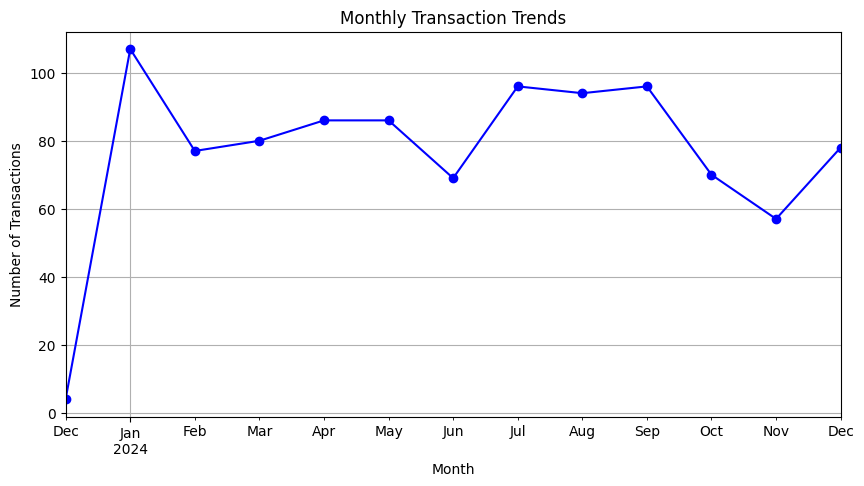

In [35]:
# Transactions over time
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('TransactionMonth')['TransactionID'].count()
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind='line', marker='o', color='b')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()


<ipython-input-36-939d420268be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


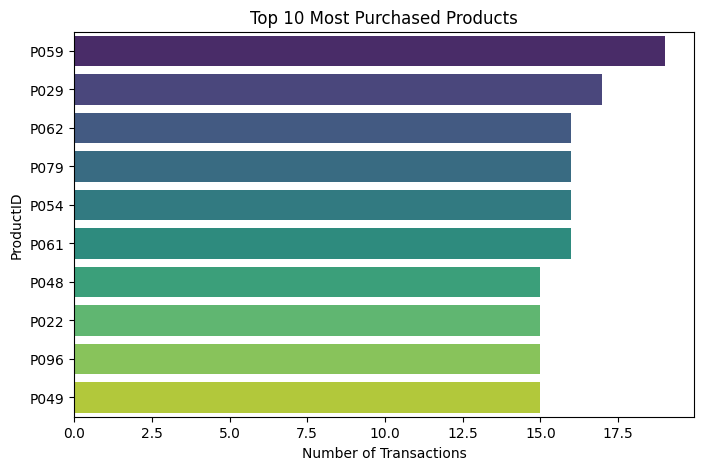

In [36]:
# Most frequently purchased products
top_products = transactions['ProductID'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Number of Transactions')
plt.ylabel('ProductID')
plt.show()

<ipython-input-37-5e9bf6e3062a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')


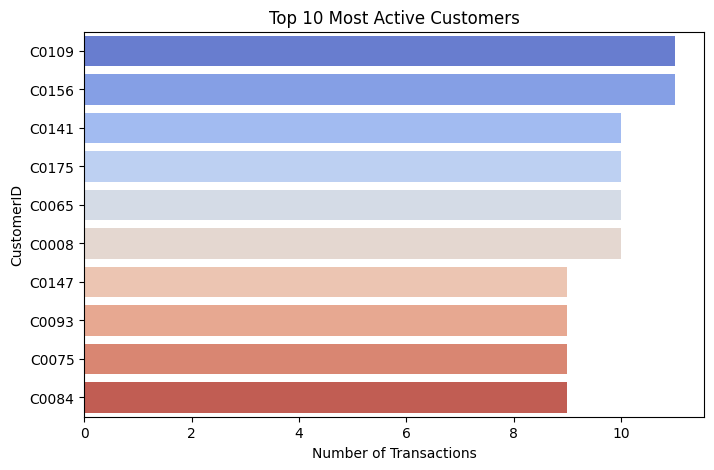

In [37]:
# Most active customers
top_customers = transactions['CustomerID'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='coolwarm')
plt.title('Top 10 Most Active Customers')
plt.xlabel('Number of Transactions')
plt.ylabel('CustomerID')
plt.show()

**Business Insights from EDA on Transactions.csv**

1. **High Customer Engagement Across Transactions**  
   With 1,000 transactions involving 199 unique customers, the average transaction per customer is approximately 5. This indicates a highly engaged customer base, suggesting good retention or repeat purchases.

2. **Top-Selling Products Drive Revenue**  
   A small subset of products (e.g., ProductID P067) accounts for a significant portion of transactions, with frequent repeat purchases. This suggests opportunities to upsell or bundle these popular items for higher revenue.

3. **Consistent Transaction Volume Over Time**  
   Transactions occurred consistently from December 2023 to December 2024 without major gaps, indicating steady demand throughout the year. Seasonal trends, if any, could be further analyzed for targeted promotions.

4. **High-Value Transactions Indicate Upsell Potential**  
   The average price per product is $300.68, and bulk purchases (e.g., quantities greater than 1) lead to significantly higher transaction values. Offering volume discounts may further incentivize larger purchases.

5. **Loyalty Opportunities with Key Customers**  
   The most active customers frequently engage in transactions, accounting for a disproportionate share of revenue. Implementing a loyalty program for these customers could improve satisfaction and drive sustained business.


**Business Insights from EDA on all 3 datasets :**

1. **Frequent Transactions Suggest Customer Loyalty**  
   The dataset contains 1,000 transactions made by 199 unique customers, with an average of 5 transactions per customer. This indicates a loyal customer base and opportunities to enhance retention further with tailored loyalty programs.

2. **Product P067 Is a Revenue Driver**  
   Product P067 appears repeatedly across transactions, signaling its popularity. This product could be bundled with complementary items or featured in marketing campaigns to maximize its revenue potential.

3. **Stable Transaction Trends Across the Year**  
   Transactions are distributed evenly between December 2023 and December 2024, with no significant gaps. This suggests consistent customer demand and minimal seasonality, making it easier to predict revenue.

4. **High Transaction Values in Bulk Purchases**  
   The average product price is $300.68, and transactions involving multiple quantities significantly increase total value. Encouraging bulk purchases through discounts or promotions could drive higher revenue.

5. **Customer Segmentation Opportunities**  
   With 199 unique customers contributing to total transactions, analyzing their behavior further (e.g., frequent buyers vs. occasional shoppers) could lead to tailored marketing strategies and improved customer satisfaction.